In [1]:
import scanpy as sc
import h5py

In [9]:
def print_structure(name, obj):
    print(f"{name}: {obj}")

# 打开原始的 h5ad 文件
file_path = './data/original_intestine.h5ad'
with h5py.File(file_path, 'r') as f:
    f.visititems(print_structure)
    raw_X = f['/raw/X']
    print("Shape of raw/X:", raw_X.shape)
    print("Data in raw/X (first 10 elements):", raw_X[:10])  # 输出前10个数据点

X: <HDF5 group "/X" (3 members)>
X/data: <HDF5 dataset "data": shape (699005508,), type "<f8">
X/indices: <HDF5 dataset "indices": shape (699005508,), type "<i4">
X/indptr: <HDF5 dataset "indptr": shape (414407,), type "<i4">
obs: <HDF5 group "/obs" (19 members)>
obs/_index: <HDF5 dataset "_index": shape (414406,), type "|O">
obs/age: <HDF5 dataset "age": shape (414406,), type "<f8">
obs/age_group: <HDF5 dataset "age_group": shape (414406,), type "|O">
obs/anatomical_site: <HDF5 dataset "anatomical_site": shape (414406,), type "|O">
obs/cell_sorting: <HDF5 dataset "cell_sorting": shape (414406,), type "|O">
obs/cell_type: <HDF5 dataset "cell_type": shape (414406,), type "|O">
obs/disease: <HDF5 dataset "disease": shape (414406,), type "|O">
obs/gender: <HDF5 dataset "gender": shape (414406,), type "|O">
obs/nCount_RNA: <HDF5 dataset "nCount_RNA": shape (414406,), type "<f8">
obs/nFeature_RNA: <HDF5 dataset "nFeature_RNA": shape (414406,), type "<i4">
obs/other_metadata: <HDF5 dataset "

In [10]:
ad = sc.read_h5ad("./data/original_intestine.h5ad")
ad

ValueError: Observations annot. `var` must have as many rows as `X` has columns (1), but has 33538 rows.

In [11]:
with h5py.File(file_path, 'r+') as f:
    if '/raw' in f:
        del f['/raw']  # 删除raw数据的X部分

In [12]:
ad = sc.read_h5ad("./data/original_intestine.h5ad")
ad

AnnData object with n_obs × n_vars = 414406 × 33538
    obs: 'nCount_RNA', 'nFeature_RNA', 'cell_type', 'sample_id', 'project_id', 'sample_type', 'tissue', 'anatomical_site', 'disease', 'platform', 'age_group', 'cell_sorting', 'treatment', 'subject_id', 'age', 'gender', 'rna_source', 'other_metadata'
    var: 'gene'
    obsm: 'X_pca', 'X_umap'

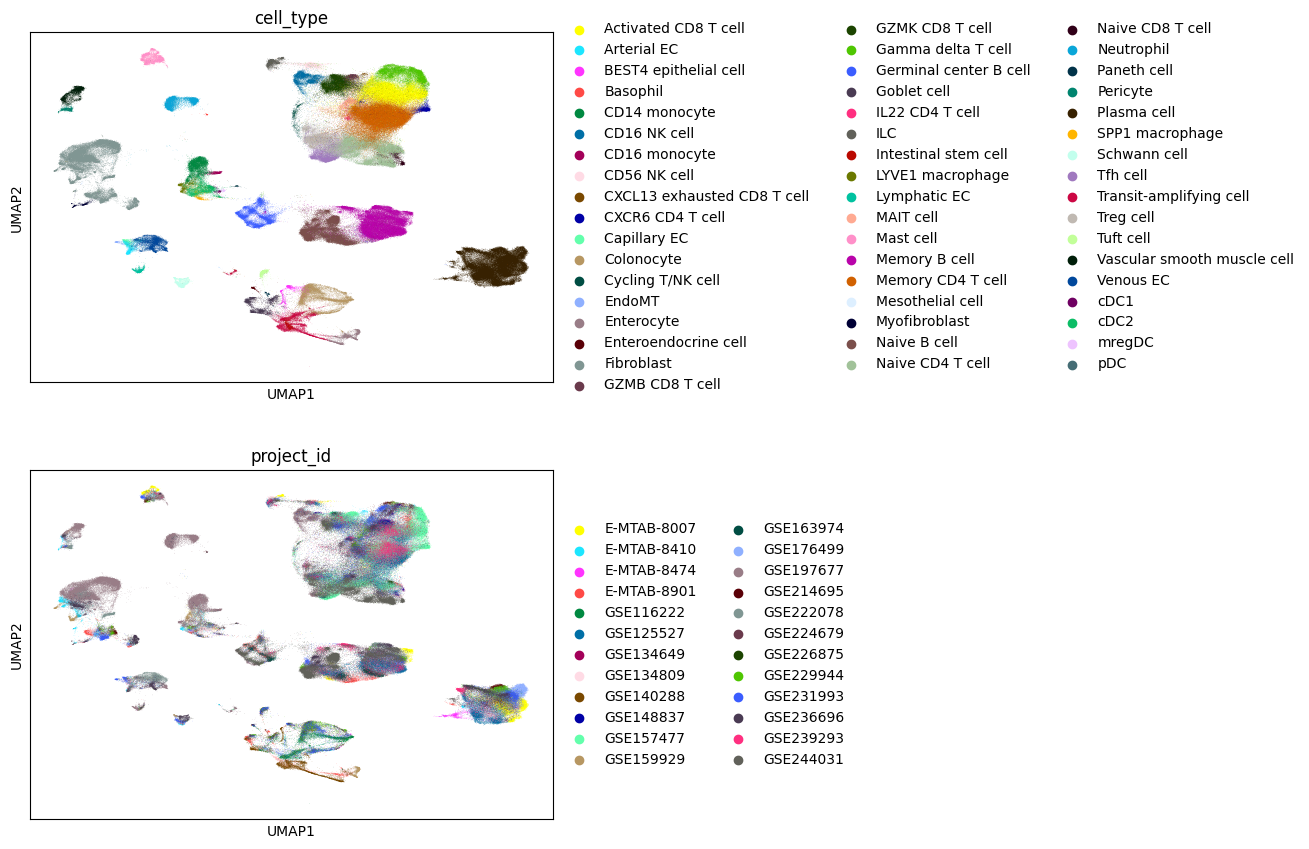

In [13]:
sc.pl.umap(ad,color=['cell_type','project_id'],palette=sc.pl.palettes.default_102,ncols=1)